In [17]:
import pandas as pd
data_path = 'tuning.csv'
data = pd.read_csv(data_path)

data.head()

,timestamp,dataset,name,split,acc_mean,acc_std,n_way,n_shot,n_query,learning_rate,backbone_weight_decay,backbone_dropout
0,20231211-002327,swissprot,relationnet_5w_5s_fc-conc_sum_7lg_4lf_0.01lr_0...,train,82.444444,10.107179,5,5,15,0.01,0.0,0.0
1,20231211-002327,swissprot,relationnet_5w_5s_fc-conc_sum_7lg_4lf_0.01lr_0...,val,56.140000,11.402714,5,5,15,0.01,0.0,0.0
2,20231211-002327,swissprot,relationnet_5w_5s_fc-conc_sum_7lg_4lf_0.01lr_0...,test,43.308889,8.014394,5,5,15,0.01,0.0,0.0
3,20231211-002641,swissprot,relationnet_5w_5s_fc-conc_sum_7lg_4lf_0.01lr_0...,train,79.315556,10.653032,5,5,15,0.01,0.0,0.1
4,20231211-002641,swissprot,relationnet_5w_5s_fc-conc_sum_7lg_4lf_0.01lr_0...,val,56.657778,11.941335,5,5,15,0.01,0.0,0.1


In [30]:
# Filter data for 'swissprot' and 'tabula muris' datasets and for 'val' and 'test' splits
swissprot_val_test = data[(data['dataset'] == 'swissprot') & (data['split'].isin(['val', 'test']))]
tabula_muris_val_test = data[(data['dataset'] == 'tabula_muris') & (data['split'].isin(['val', 'test']))]

# Find the model with the highest mean accuracy for each dataset and split
best_swissprot_val = swissprot_val_test[swissprot_val_test['split'] == 'val'].nlargest(1, 'acc_mean')
best_swissprot_test = swissprot_val_test[swissprot_val_test['split'] == 'test'].nlargest(1, 'acc_mean')
best_tabula_muris_val = tabula_muris_val_test[tabula_muris_val_test['split'] == 'val'].nlargest(1, 'acc_mean')
best_tabula_muris_test = tabula_muris_val_test[tabula_muris_val_test['split'] == 'test'].nlargest(1, 'acc_mean')

print('SP val', best_swissprot_val.name.values[0])
# print('SP test', best_swissprot_test.name.values[0])
print('TM val', best_tabula_muris_val.name.values[0])
# print('TM test', best_tabula_muris_test.name.values[0])

SP val relationnet_5w_5s_fc-conc_sum_4lg_1lf_0.001lr_0.001bbwd_0.0do
SP test relationnet_5w_5s_fc-conc_sum_7lg_1lf_0.01lr_0.001bbwd_0.2do
TM val relationnet_5w_5s_fc-conc_sum_2lg_1lf_0.001lr_0.001bbwd_0.0do
TM test relationnet_5w_5s_fc-conc_sum_4lg_1lf_0.001lr_0.001bbwd_0.0do


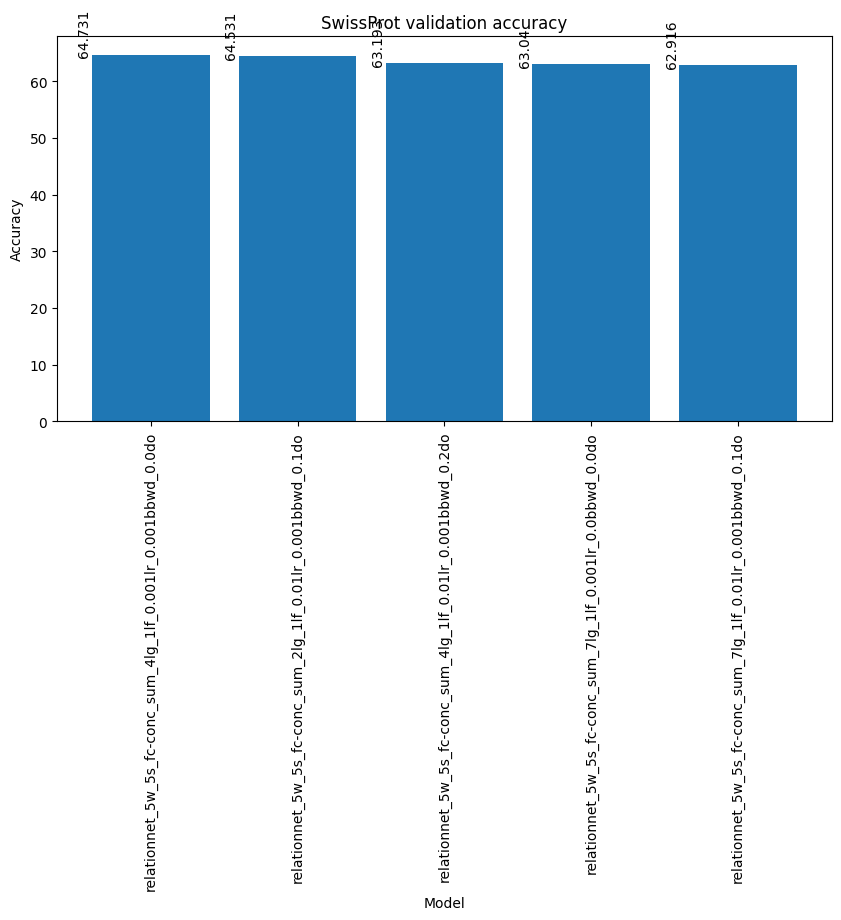

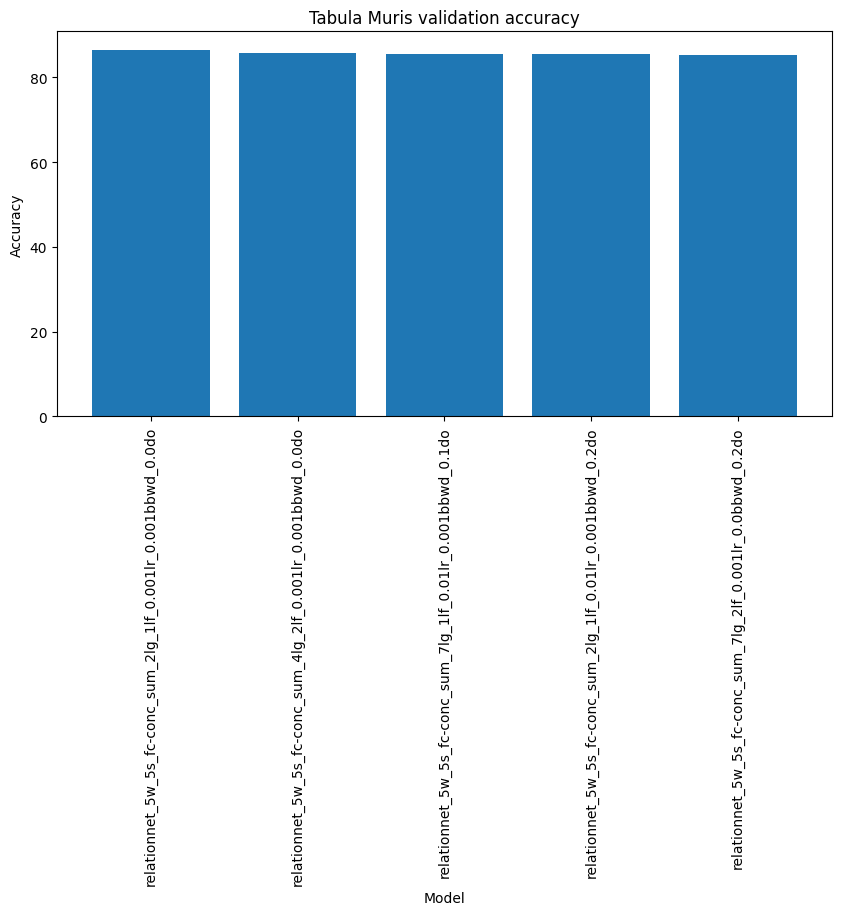

In [47]:
# Show as bar plot the n best models for each dataset and split on val
n = 5
tabula_muris_val = tabula_muris_val_test[tabula_muris_val_test['split'] == 'val'].nlargest(n, 'acc_mean')
swissprot_val = swissprot_val_test[swissprot_val_test['split'] == 'val'].nlargest(n, 'acc_mean')

import matplotlib.pyplot as plt
import numpy as np

# for swissprot
plt.figure(figsize=(10, 5))
plt.title('SwissProt validation accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.bar(swissprot_val.name.values, swissprot_val.acc_mean.values)

# print value on top of bar
for i, v in enumerate(swissprot_val.acc_mean.values):
    plt.text(i - 0.5, v + 0.01, str(np.round(v, 3)), rotation=90)
plt.show()

# for tabula muris
plt.figure(figsize=(10, 5))
plt.title('Tabula Muris validation accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.bar(tabula_muris_val.name.values, tabula_muris_val.acc_mean.values)
plt.show()